In [2]:
from pdf2image import convert_from_path

# Đường dẫn đến tập tin PDF
pdf_path = "N2-短文2.pdf"

# Chuyển đổi PDF sang danh sách các hình ảnh
images = convert_from_path(pdf_path)

# Lưu từng trang như một hình ảnh PNG
for i, image in enumerate(images):
    image.save(f'page_{i + 1}.png', 'PNG')

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [1]:
!pip install pdf2image

You should consider upgrading via the 'c:\users\minhd\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------- ----------------------- 0.8/1.8 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 29.2 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 16.6 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\594121\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from PIL import Image
import pyocr
import pyocr.builders

tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found!")
    sys.exit(1)

tool = tools[0]  # Assuming Tesseract is the first tool available

# Prepare to write to a text file
with open('extracted_text.txt', 'w') as file:
    for i in range(1, 201):  # Loop from page 1 to page 200
        image_path = f'page_{i}.png'
        try:
            img = Image.open(image_path)
            txt = tool.image_to_string(
                img,
                lang='jpn',
                builder=pyocr.builders.TextBuilder()
            )
            # Write the extracted text to a file
            file.write(f'--- Page {i} ---\n')
            file.write(txt)
            file.write('\n\n')
        except FileNotFoundError:
            print(f"File not found: {image_path}")
        except Exception as e:
            print(f"An error occurred with {image_path}: {str(e)}")

print("OCR processing complete. Text saved to 'extracted_text.txt'.")


OCR processing complete. Text saved to 'extracted_text.txt'.


In [8]:
brew install tesseract


SyntaxError: invalid syntax (502700605.py, line 1)

In [9]:
!pip install Pillow pyocr


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install pymupdf
!pip install pandas

  Obtaining dependency information for pymupdf from https://files.pythonhosted.org/packages/1d/32/89e8501647a339d097e0621eeae09ddd199cfb0e8bef0e675928b9da9463/PyMuPDF-1.24.7-cp312-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for PyMuPDFb==1.24.6 from https://files.pythonhosted.org/packages/ca/1d/a6fde4c325da9dfc85a249f5ecb6bd52b2691f41cb7087264552b29439b7/PyMuPDFb-1.24.6-py3-none-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 30.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [56]:
import ebooklib
from ebooklib import epub
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
import re
import pandas as pd
def read_epub(epub_path):
    """Mở file EPUB và trích xuất toàn bộ nội dung các chương."""
    book = epub.read_epub(epub_path)
    full_text = ""

    for item in book.get_items():
        if item.get_type() == ebooklib.ITEM_DOCUMENT:
            soup = BeautifulSoup(item.get_content(), 'html.parser')
            text = soup.get_text(separator="\n")
            text = re.sub(r'\n\s*\n', '\n', text)  # Loại bỏ các dòng trắng
            full_text += text
            full_text += "\n\n"  # Thêm khoảng trống giữa các chương để dễ đọc

    return full_text

def extract_positions(lines):
    """Xác định vị trí của các câu hỏi và câu trả lời."""
    question_positions = []
    answer_positions = []
    
    for i, line in enumerate(lines):
        line = line.strip()
        if line.startswith("Question #"):
            question_positions.append(i)
        elif re.match(r"Answer to Q\d+:", line):
            answer_positions.append(i)
    
    return question_positions, answer_positions

def extract_content(lines, start, end):
    """Trích xuất nội dung từ start đến end."""
    content = "\n".join(lines[start:end]).strip()
    return content

def extract_answers(lines, answer_positions):
    """Trích xuất các câu trả lời từ nội dung."""
    answers = {}
    for i in range(len(answer_positions)):
        answer_start = answer_positions[i]
        answer_end = answer_positions[i + 1] if i + 1 < len(answer_positions) else len(lines)
        question_id = re.search(r"Answer to (Q\d+):", lines[answer_start]).group(1)
        answer_lines = lines[answer_start:answer_end]
        filtered_answer_lines = [line for line in answer_lines if not line.startswith("Go back to Q")]
        answer_content = "\n".join(filtered_answer_lines).strip()
        answers[question_id] = answer_content
    return answers

def extract_questions_and_answers(full_text):
    """Trích xuất các câu hỏi và câu trả lời từ nội dung."""
    lines = full_text.split('\n')
    questions = []
    
    question_positions, answer_positions = extract_positions(lines)
    
    for i in range(len(question_positions)):
        question_start = question_positions[i]
        question_end = question_positions[i + 1] if i + 1 < len(question_positions) else len(lines)
        
        question_lines = lines[question_start:question_end]
        filtered_question_lines = [line for line in question_lines if not line.startswith("Check answer to Question #")]
        question = "\n".join(filtered_question_lines).strip()
        questions.append(question)
    
    answers = extract_answers(lines, answer_positions)

    print(f"Total questions found: {len(questions)}")
    print(f"Total answers found: {len(answers)}")

    return questions, answers

def filter_references(answers):
    """Loại bỏ phần "References" trong câu trả lời."""
    for key in answers:
        answer_lines = answers[key].split('\n')
        filtered_lines = [line for line in answer_lines if not line.startswith("References")]
        answers[key] = "\n".join(filtered_lines)
    return answers

def match_questions_answers(questions, answers):
    """Ghép nối câu hỏi và câu trả lời."""
    questions_answers = []
    log = []
    total_questions = len(questions)
    total_answers = len(answers)
    matched_count = 0
    unmatched_count = 0

    for question in questions:
        match = re.search(r"Question #\d+", question)
        if match:
            question_id = match.group().replace("Question #", "Q")
            answer = answers.get(question_id, "No answer found")
            questions_answers.append((question, answer))
            if answer != "No answer found":
                matched_count += 1
                log.append(f"{question_id} and its answer were extracted successfully.")
            else:
                unmatched_count += 1
                log.append(f"{question_id} was extracted but no answer found.")
        else:
            unmatched_count += 1
            log.append("A question was found but it did not match the expected format.")

    summary = {
        'total_questions': total_questions,
        'total_answers': total_answers,
        'matched_count': matched_count,
        'unmatched_count': unmatched_count
    }

    return questions_answers, log, summary

def save_to_tsv(questions_answers, output_path):
    """Lưu DataFrame thành file CSV hoặc TSV."""
    df = pd.DataFrame(questions_answers, columns=['Question', 'Answer'])
    df.to_csv(output_path, sep='\t', index=False)


In [57]:
import ebooklib
from ebooklib import epub
from bs4 import BeautifulSoup
# Đường dẫn tới file PDF
epub_path = 'SAA-C02 Practice Questions (500+) AWS Certified Solutions Architect Associate 2020 Guaranteed Pass with over 500+ high... (Haider, Rehan) (Z-Library).epub'
output_path = 'anki_import.csv'
print("Reading EPUB file...")
full_text = read_epub(epub_path)
print("EPUB file read successfully.")

print("Extracting questions and answers...")
questions, answers = extract_questions_and_answers(full_text)
print(f"Questions and answers extracted successfully. Total questions: {len(questions)}, Total answers: {len(answers)}")

print("Filtering references from answers...")
answers = filter_references(answers)
print("References filtered successfully.")

print("Matching questions with answers...")
questions_answers, log, summary = match_questions_answers(questions, answers)
print(f"Questions and answers matched successfully. Matched: {summary['matched_count']}, Unmatched: {summary['unmatched_count']}")

print("Saving to TSV...")
save_to_tsv(questions_answers, output_path)
print("Data has been successfully exported to anki_import.csv")

print("\nLog:")
for log_entry in log:
    print(log_entry)

print("\nSummary:")
print(f"Total questions: {summary['total_questions']}")
print(f"Total answers: {summary['total_answers']}")
print(f"Matched questions and answers: {summary['matched_count']}")
print(f"Unmatched questions: {summary['unmatched_count']}")

Reading EPUB file...
EPUB file read successfully.
Extracting questions and answers...
Total questions found: 520
Total answers found: 520
Questions and answers extracted successfully. Total questions: 520, Total answers: 520
Filtering references from answers...
References filtered successfully.
Matching questions with answers...
Questions and answers matched successfully. Matched: 520, Unmatched: 0
Saving to TSV...
Data has been successfully exported to anki_import.csv

Log:
Q1 and its answer were extracted successfully.
Q2 and its answer were extracted successfully.
Q3 and its answer were extracted successfully.
Q4 and its answer were extracted successfully.
Q5 and its answer were extracted successfully.
Q6 and its answer were extracted successfully.
Q7 and its answer were extracted successfully.
Q8 and its answer were extracted successfully.
Q9 and its answer were extracted successfully.
Q10 and its answer were extracted successfully.
Q11 and its answer were extracted successfully.
Q

In [8]:
def main():
    pdf_document = open_pdf(pdf_path)
    questions = extract_questions(pdf_document, 4, 294)
    answers = extract_answers(pdf_document, 294)
    answers = filter_references(answers)
    questions_answers, log = match_questions_answers(questions, answers)
    save_to_tsv(questions_answers, 'anki_import.tsv')
    save_log(log, 'extraction_log.txt')

    print(f"Data has been successfully exported to anki_import.tsv")
    print(f"Log has been successfully exported to extraction_log.txt")

if __name__ == "__main__":
    main()

NameError: name 'open_pdf' is not defined

In [4]:
pip install frontend

  Obtaining dependency information for frontend from https://files.pythonhosted.org/packages/98/02/a9c4713b26ae11464ac334b59504ef6fe66e2c323ee44520ca1cd6dc4929/frontend-0.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for starlette>=0.12.0 from https://files.pythonhosted.org/packages/fd/18/31fa32ed6c68ba66220204ef0be798c349d0a20c1901f9d4a794e08c76d8/starlette-0.37.2-py3-none-any.whl.metadata
  Obtaining dependency information for uvicorn>=0.7.1 from https://files.pythonhosted.org/packages/b2/f9/e6f30ba6094733e4f9794fd098ca0543a19b07ac1fa3075d595bf0f1fb60/uvicorn-0.30.1-py3-none-any.whl.metadata
  Obtaining dependency information for itsdangerous>=1.1.0 from https://files.pythonhosted.org/packages/04/96/92447566d16df59b2a776c0fb82dbc4d9e07cd95062562af01e408583fc4/itsdangerous-2.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for aiofiles from https://files.pythonhosted.org/packages/a5/45/30bb92d442636f570cb5651bc661f52b610e2eec3f891a5dc3a4c3667db0/aiof

In [1]:
import sqlite3
import json

# Đường dẫn đến file cookies đã sao chép
cookie_file = 'C:/Users/<Your_Username>/Documents/Cookies'

# Kết nối đến file cookies
con = sqlite3.connect(cookie_file)
cur = con.cursor()

# Truy vấn cookies
cur.execute("SELECT host_key, name, value, path, expires_utc FROM cookies")

cookie_dict = []
for item in cur.fetchall():
    cookie_dict.append({
        "domain": item[0],
        "name": item[1],
        "value": item[2],
        "path": item[3],
        "expires": item[4]
    })

con.close()

# Lưu cookies vào file cookies.txt
with open('cookies.txt', 'w') as file:
    for cookie in cookie_dict:
        file.write(f"{cookie['domain']}\tTRUE\t{cookie['path']}\tFALSE\t{cookie['expires']}\t{cookie['name']}\t{cookie['value']}\n")

print("Cookies have been saved to cookies.txt")


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\594121\\AppData\\Roaming\\..\\Local\\Google\\Chrome\\User Data\\Default\\Network\\Cookies'

In [4]:
!pip install browser-cookie3


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------  1.8/1.8 MB 56.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 28.6 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\594121\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import yt_dlp

def download_video(url, cookie_file):
    ydl_opts = {
        'outtmpl': '%(title)s.%(ext)s',  # Lưu video với tên video và đuôi gốc
        'format': 'best',  # Tải chất lượng tốt nhất có sẵn
        'cookiefile': cookie_file,  # Sử dụng file cookie
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

if __name__ == "__main__":
    video_url = input("Nhập URL video cần tải: ")
    cookie_file = 'cookies_netscape.txt'  # File cookie
    download_video(video_url, cookie_file)


[GoogleDrive] Extracting URL: https://drive.google.com/file/d/1ay2YC89mUN8mBSxaUc_WyxNs4lblg6iB/view?usp=sharing
[GoogleDrive] 1ay2YC89mUN8mBSxaUc_WyxNs4lblg6iB: Downloading video webpage
[GoogleDrive] 1ay2YC89mUN8mBSxaUc_WyxNs4lblg6iB: Requesting source file


ERROR: [GoogleDrive] 1ay2YC89mUN8mBSxaUc_WyxNs4lblg6iB: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


DownloadError: ERROR: [GoogleDrive] 1ay2YC89mUN8mBSxaUc_WyxNs4lblg6iB: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U

In [1]:
import http.cookiejar as cookiejar
from urllib.parse import urlparse
import json

# Mẫu dữ liệu cookies
cookies = [
    {
        "domain": "https://drive.google.com/",
        "expirationDate": 1693785927,
        "hostOnly": False,
        "httpOnly": True,
        "name": "cookie_name",
        "path": "/",
        "secure": False,
        "value": "cookie_value"
    },
    # Thêm các cookies khác nếu cần
]

# Chuyển đổi cookies từ định dạng JSON sang định dạng Netscape
def save_cookies_to_netscape_format(cookies, filename):
    with open(filename, 'w') as file:
        file.write("# Netscape HTTP Cookie File\n")
        file.write("# This file was generated by Python\n")
        file.write("#\n")

        for cookie in cookies:
            domain = cookie['domain']
            flag = 'TRUE' if not cookie['hostOnly'] else 'FALSE'
            path = cookie['path']
            secure = 'TRUE' if cookie['secure'] else 'FALSE'
            expiration = str(int(cookie['expirationDate'])) if 'expirationDate' in cookie else '0'
            name = cookie['name']
            value = cookie['value']

            file.write(f"{domain}\t{flag}\t{path}\t{secure}\t{expiration}\t{name}\t{value}\n")




In [16]:
import json

# Input data
data = """
AEC	AVYB7cry4lKZ2AobFQW8aZcUM5lGmJScAY07UVh_PJVZm-EZE-Kka9xsrmI	.google.com	/	2024-08-17T00:43:41.074Z	62	✓	✓	Lax			Medium	
APISID	6ef2oBgldeimjMxH/AnIk_-_Mca5DCbmyq	.google.com	/	2025-08-20T04:43:24.891Z	40						High	
COMPASS	photos-fife=CgAQhcfLtQYaUQAJa4lXGi8N93hxlZRlVLyha_lfufo5ek78Mra2S_P2m4fUHJe19hEsqaaDRTeaxdnP2zzHxVrJkoX-_nEAj1WKemUpX2WG6nmqg-bR-nbyRTAB:appsfrontendserver=CgAQkrTLtQYaegAJa4lXYsfduqMX4uFb8j1iVoAUBUNWEApNpGstS1TyOMCTdCkIZXYWx7l_grP7eMPGIFbh6quUPamy1ZJiiKEfn9GD0Alx3OfCf8BKN9-ZLYVfEjfjLrkJwXRe7wiqTshTB7Jm_8exCG0AoWtlWkb3393MSl6Nq5KVIAEwAQ	drive.google.com	/	2024-08-17T02:02:11.615Z	345	✓	✓	None			Medium	
DRIVE_STREAM	a8682Toe4jg	.drive.google.com	/	Session	23	✓	✓	None			Medium	
HSID	ANbZ06Yy-lWbeondR	.google.com	/	2025-08-20T04:43:24.891Z	21	✓					High	
NID	516=Aahku_lap08ha0Rhjv2GAsimzI-8KToqR_RNhT9R4vBktxeRWCzyIIMjjAGnRKT_8ELlQew403sfyWZwrMWYtR1ajoZx_3xx9_H1EI7X6FFekzG6rrIYjw0SqKOJw6uKHB27xRYzvpYsS8hU330bTNdzKkvg3tNifAT1ldrGcktHOa-5D6gBDMNXtpMA9E15VXKCK6he47vKReG85MYvBOmUuKeNm565Rjv1G8okll1JK_ncohWzV03QTHHwQ8FfJgako2dh8xYFyVuzk_4gzCoM7wBGhXgHY_yjeAKA03CAvipBb5DBIHS7pT6NN12OCOX6VAdH6Ccno7_kouKhUq7C1s6YMadmqrtxNOBplClv-NMhp8tLJcqA5kjOpNsZN8YWvjswqzMBd8NlI7i6_vro_dF8hhB0dODONH8_AL76dB4-lOm_UqXGL0agwZCW3-XYs9_6k-YLS-hyFvffYV_vEKVHsLyZZYEG-BMq8DmaW0eTOFp3IMx3r3nNy86TB_TeH3Lruzw40MmM6iLf_BMrETvSL_QO6aH7obKLhAX_bVxyHWpQO8CovEcHC3UI7gEbkcDX1JbpLXf4LCBsUJLDxl71g3lGfIwG9TKXkDlOeUP99cvturiPiTMpjCgQccb4HXYXqkfhYMRJSrLDpV59xsHjaT8CM2v-yLxQ60SAKzxFGQKoCcT8yeQ5jTNETXjyMsrJu1H9RRLZq7X1bXxG-hMyfA	.google.com	/	2025-02-06T00:30:35.836Z	741	✓	✓	None			Medium	
OGPC	19042908-1:	.google.com	/	2024-08-31T09:14:02.000Z	15						Medium	
OSID	g.a000fwhF5GNiTa_yoCEAzkwnitjw-MP3bTks07thWuAIPT4Bd8hxWX_yJX5uEZY2CLqauGdwJQACgYKAZoSAQASFQHGX2MiEFulICkVYblaO3badrakcRoVAUF8yKriTpTSfo58KtcQeQae4O0j0076	play.google.com	/	2025-03-01T00:55:42.180Z	157	✓	✓				Medium	
OSID	g.a000mAhF5Nb0KlucH2EL5anXGMFPjKV54Ji0Nd2Zt_ml24pEfnRzr0k1hd6XSPNh0n_8lsSnOwACgYKATsSARUSFQHGX2MiwjZzEuAvLo50fgWr7NsvwBoVAUF8yKrvIAgc907cpuzlldGUXKRg0076	drive.google.com	/	2025-08-27T00:56:17.940Z	157	✓	✓				Medium	
OTZ	7648091_20_20__20_	www.google.com	/	2024-08-16T04:10:41.000Z	21		✓				Medium	
OTZ	7648134_20_20__20_	drive.google.com	/	2024-08-16T04:53:53.000Z	21		✓				Medium	
SAPISID	eGQe0mdhuvVR-hEX/Afnr27cgtVcPVZ2Q5	.google.com	/	2025-08-20T04:43:24.891Z	41		✓				High	
SEARCH_SAMESITE	CgQI4JsB	.google.com	/	2025-01-28T02:07:23.940Z	23			Strict			Medium	
SID	g.a000lwhF5EA872_ZVK7tYuARkl--rS3BcufevxVwM9wNnZuuZhah-QAIoA_faaS0VPVJLsmDxwACgYKAQYSAQASFQHGX2MiiIi0PVRUthHrbn9w3qbk2BoVAUF8yKrNPpdLaIpYgoBEdUsyKC_Z0076	.google.com	/	2025-08-20T04:43:24.891Z	156						High	
SIDCC	AKEyXzVxiLQmgPFDBoiKRcuuoe6aJANbPYhX0aHQ1s_Sht0DGZ--kBs9CTshQ3fIAD3ad_m7gjSR	.google.com	/	2025-08-07T02:22:25.983Z	81						High	
SSID	AHJWyDlypRr3t5edO	.google.com	/	2025-08-20T04:43:24.891Z	21	✓	✓				High	
__Secure-1PAPISID	eGQe0mdhuvVR-hEX/Afnr27cgtVcPVZ2Q5	.google.com	/	2025-08-20T04:43:24.891Z	51		✓				High	
__Secure-1PSID	g.a000lwhF5EA872_ZVK7tYuARkl--rS3BcufevxVwM9wNnZuuZhahhBfcT_uASfnwJjOegl6zswACgYKARMSAQASFQHGX2MijvqwCauCpWVgh8WZUARGghoVAUF8yKpLEkMyqa8fXzkxbxzI3uZw0076	.google.com	/	2025-08-20T04:43:24.891Z	167	✓	✓				High	
__Secure-1PSIDCC	AKEyXzVc3UO3NfqrtEGSw4haBHJj5D4yKcO6mvWO6N7fbJEYkDLj6iKiyJjjHLJeTyxeEOiSclE	.google.com	/	2025-08-07T02:22:25.983Z	91	✓	✓				High	
__Secure-1PSIDTS	sidts-CjIB4E2dkbLfMnJoWkJGWkwh5E7JOwG7G7uNrhUUD27N7bF33W9_HJMir7NOhAYpz_wIiRAA	.google.com	/	2025-08-07T02:22:25.982Z	94	✓	✓				High	
__Secure-3PAPISID	eGQe0mdhuvVR-hEX/Afnr27cgtVcPVZ2Q5	.google.com	/	2025-08-20T04:43:24.891Z	51		✓	None			High	
__Secure-3PSID	g.a000lwhF5EA872_ZVK7tYuARkl--rS3BcufevxVwM9wNnZuuZhaho4dv8byUcqNgadLH8PxtsQACgYKAVcSAQASFQHGX2MidSkp7UR1Gp341c47bxsi3hoVAUF8yKq4uholqR9O19kjw0AMqPv20076	.google.com	/	2025-08-20T04:43:24.892Z	167	✓	✓	None			High	
__Secure-3PSIDCC	AKEyXzXp49TdWJooeh1Ro2LdFIRH39ORNDYuPEJ07XsoDKiyJsjtCc7yzIaZbB5XGecxKmneDlg	.google.com	/	2025-08-07T02:26:50.903Z	91	✓	✓	None			High	
__Secure-3PSIDTS	sidts-CjIB4E2dkbLfMnJoWkJGWkwh5E7JOwG7G7uNrhUUD27N7bF33W9_HJMir7NOhAYpz_wIiRAA	.google.com	/	2025-08-07T02:22:25.982Z	94	✓	✓	None			High	
__Secure-OSID	g.a000fwhF5GNiTa_yoCEAzkwnitjw-MP3bTks07thWuAIPT4Bd8hxxTncjcuX8kAVx3T8uIu5UgACgYKAQQSAQASFQHGX2MiYMKS-YEwfRNPviB_fuHv9BoVAUF8yKpTMwAvHo765UgRGjq0vBbk0076	play.google.com	/	2025-03-01T00:55:42.180Z	166	✓	✓	None			Medium	
__Secure-OSID	g.a000mAhF5Nb0KlucH2EL5anXGMFPjKV54Ji0Nd2Zt_ml24pEfnRzBB6OF5BGLsic0YIdAr-T8AACgYKAZwSARUSFQHGX2Miuk2G6h9ffAc-X53M8n5BmRoVAUF8yKqrITZtLjUDM5_hK9zS0kZd0076	drive.google.com	/	2025-08-27T00:56:17.940Z	166	✓	✓	None			Medium	
_ga	GA1.1.2144505122.1680511500	.play.google.com	/	2025-03-01T00:55:43.437Z	30						Medium	
_ga_6VGGZHMLM2	GS1.1.1706230543.2.0.1706230543.0.0.0	.play.google.com	/	2025-03-01T00:55:43.525Z	51						Medium	
receive-cookie-deprecation	1	www.google.com	/	2024-12-03T09:19:31.234Z	27	✓	✓	None	https://google.com		Medium			High
"""

# Parse the data
lines = data.strip().split("\n")
cookies = []

for line in lines:
    parts = line.split("\t")
    cookies.append({
        "Name": parts[0],
        "Value": parts[1],
        "Domain": parts[2],
        "Path": parts[3],
        "Expires": parts[4],
        "Size": int(parts[5]),
        "HttpOnly": parts[6] == "✓",
        "Secure": parts[7] == "✓",
        "SameSite": parts[8] if parts[8] else None,
        "Priority": parts[11]
    })

# Convert to JSON
cookies_json = json.dumps(cookies, indent=4)

# Save to a file
# with open("/mnt/data/cookies.json", "w") as file:
#     file.write(cookies_json)

print(cookies_json)


[
    {
        "Name": "AEC",
        "Value": "AVYB7cry4lKZ2AobFQW8aZcUM5lGmJScAY07UVh_PJVZm-EZE-Kka9xsrmI",
        "Domain": ".google.com",
        "Path": "/",
        "Expires": "2024-08-17T00:43:41.074Z",
        "Size": 62,
        "HttpOnly": true,
        "Secure": true,
        "SameSite": "Lax",
        "Priority": "Medium"
    },
    {
        "Name": "APISID",
        "Value": "6ef2oBgldeimjMxH/AnIk_-_Mca5DCbmyq",
        "Domain": ".google.com",
        "Path": "/",
        "Expires": "2025-08-20T04:43:24.891Z",
        "Size": 40,
        "HttpOnly": false,
        "Secure": false,
        "SameSite": null,
        "Priority": "High"
    },
    {
        "Name": "COMPASS",
        "Value": "photos-fife=CgAQhcfLtQYaUQAJa4lXGi8N93hxlZRlVLyha_lfufo5ek78Mra2S_P2m4fUHJe19hEsqaaDRTeaxdnP2zzHxVrJkoX-_nEAj1WKemUpX2WG6nmqg-bR-nbyRTAB:appsfrontendserver=CgAQkrTLtQYaegAJa4lXYsfduqMX4uFb8j1iVoAUBUNWEApNpGstS1TyOMCTdCkIZXYWx7l_grP7eMPGIFbh6quUPamy1ZJiiKEfn9GD0Alx3OfCf8BKN9-ZLYVfEjfj

In [27]:
from datetime import datetime
def save_cookies_to_netscape_format(cookies, filename):
    with open(filename, 'w') as file:
        file.write("# Netscape HTTP Cookie File\n")
        file.write("# This file was generated by Python\n")
        file.write("#\n")
        cookies = json.loads(cookies)  
        for cookie in cookies:
            print(cookie)
            domain = cookie['Domain']
            flag = 'TRUE' if domain.startswith('.') else 'FALSE'
            path = cookie['Path']
            secure = 'TRUE' if cookie['Secure'] else 'FALSE'
            
            if cookie['Expires'] == 'Session':
                expiration = '0'
            else:
                # Convert the expiration date to a Unix timestamp
                expiration_date = datetime.fromisoformat(cookie['Expires'].replace('Z', '+00:00'))
                expiration = str(int(expiration_date.timestamp()))
            
            name = cookie['Name']
            value = cookie['Value']

            file.write(f"{domain}\t{flag}\t{path}\t{secure}\t{expiration}\t{name}\t{value}\n")



# Save the cookies in Netscape format
save_cookies_to_netscape_format(cookies_json, "cookies_netscape.txt")

{'Name': 'AEC', 'Value': 'AVYB7cry4lKZ2AobFQW8aZcUM5lGmJScAY07UVh_PJVZm-EZE-Kka9xsrmI', 'Domain': '.google.com', 'Path': '/', 'Expires': '2024-08-17T00:43:41.074Z', 'Size': 62, 'HttpOnly': True, 'Secure': True, 'SameSite': 'Lax', 'Priority': 'Medium'}
{'Name': 'APISID', 'Value': '6ef2oBgldeimjMxH/AnIk_-_Mca5DCbmyq', 'Domain': '.google.com', 'Path': '/', 'Expires': '2025-08-20T04:43:24.891Z', 'Size': 40, 'HttpOnly': False, 'Secure': False, 'SameSite': None, 'Priority': 'High'}
{'Name': 'COMPASS', 'Value': 'photos-fife=CgAQhcfLtQYaUQAJa4lXGi8N93hxlZRlVLyha_lfufo5ek78Mra2S_P2m4fUHJe19hEsqaaDRTeaxdnP2zzHxVrJkoX-_nEAj1WKemUpX2WG6nmqg-bR-nbyRTAB:appsfrontendserver=CgAQkrTLtQYaegAJa4lXYsfduqMX4uFb8j1iVoAUBUNWEApNpGstS1TyOMCTdCkIZXYWx7l_grP7eMPGIFbh6quUPamy1ZJiiKEfn9GD0Alx3OfCf8BKN9-ZLYVfEjfjLrkJwXRe7wiqTshTB7Jm_8exCG0AoWtlWkb3393MSl6Nq5KVIAEwAQ', 'Domain': 'drive.google.com', 'Path': '/', 'Expires': '2024-08-17T02:02:11.615Z', 'Size': 345, 'HttpOnly': True, 'Secure': True, 'SameSite': 'None',

In [25]:

for cookie in parsed_data:
    print(cookie)

{'Name': 'AEC', 'Value': 'AVYB7cry4lKZ2AobFQW8aZcUM5lGmJScAY07UVh_PJVZm-EZE-Kka9xsrmI', 'Domain': '.google.com', 'Path': '/', 'Expires': '2024-08-17T00:43:41.074Z', 'Size': 62, 'HttpOnly': True, 'Secure': True, 'SameSite': 'Lax', 'Priority': 'Medium'}
{'Name': 'APISID', 'Value': '6ef2oBgldeimjMxH/AnIk_-_Mca5DCbmyq', 'Domain': '.google.com', 'Path': '/', 'Expires': '2025-08-20T04:43:24.891Z', 'Size': 40, 'HttpOnly': False, 'Secure': False, 'SameSite': None, 'Priority': 'High'}
{'Name': 'COMPASS', 'Value': 'photos-fife=CgAQhcfLtQYaUQAJa4lXGi8N93hxlZRlVLyha_lfufo5ek78Mra2S_P2m4fUHJe19hEsqaaDRTeaxdnP2zzHxVrJkoX-_nEAj1WKemUpX2WG6nmqg-bR-nbyRTAB:appsfrontendserver=CgAQkrTLtQYaegAJa4lXYsfduqMX4uFb8j1iVoAUBUNWEApNpGstS1TyOMCTdCkIZXYWx7l_grP7eMPGIFbh6quUPamy1ZJiiKEfn9GD0Alx3OfCf8BKN9-ZLYVfEjfjLrkJwXRe7wiqTshTB7Jm_8exCG0AoWtlWkb3393MSl6Nq5KVIAEwAQ', 'Domain': 'drive.google.com', 'Path': '/', 'Expires': '2024-08-17T02:02:11.615Z', 'Size': 345, 'HttpOnly': True, 'Secure': True, 'SameSite': 'None',

In [32]:
import requests

def load_cookies_from_netscape_file(cookie_file_path):
    cookies = {}
    with open(cookie_file_path, 'r') as file:
        for line in file:
            if not line.startswith("#") and line.strip():
                parts = line.split('\t')
                domain = parts[0]
                name = parts[5]
                value = parts[6].strip()
                cookies[name] = value
    return cookies

def download_file_from_drive(file_id, output, cookies):
    session = requests.Session()
    for name, value in cookies.items():
        session.cookies.set(name, value)

    # Google Drive URL for exporting file
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    response = session.get(url, stream=True)

    # Google Drive uses a confirmation prompt for large files
    if 'confirm' in response.url:
        params = {'id': file_id, 'confirm': response.url.split('=')[-1]}
        response = session.get(url, params=params, stream=True)

    if response.status_code == 200:
        with open(output, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

# Load cookies from a Netscape format cookie file
cookie_file_path = 'cookies_netscape.txt'
cookies = load_cookies_from_netscape_file(cookie_file_path)

# URL of the Google Drive file (ensure it's a direct download link)
file_url = 'https://drive.google.com/file/d/1ay2YC89mUN8mBSxaUc_WyxNs4lblg6iB/view?usp=sharing'

# Output file path
output_file_path = 'file.mp4'

# Download the file
download_file_from_drive(file_url, output_file_path, cookies)


Failed to download file. Status code: 404


In [2]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
import time

def fetch_company_info(company_name):
    # Setup WebDriver
    chromedriver_path = 'E:\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe'
    service = Service(executable_path=chromedriver_path)
    driver = webdriver.Chrome(service=service)

    try:
        # Navigate to the website
        driver.get("https://masothue.com/")
        time.sleep(1)

        # Wait for the input element to be clickable
        input_element = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, "search"))
        )

        # Enter the company name
        input_element.send_keys(company_name)
        time.sleep(1)

        # Select the company type
        select_element = driver.find_element(By.ID, "product_cat")
        for option in select_element.find_elements(By.TAG_NAME, 'option'):
            if option.text == 'Tên công ty':
                option.click()
                break
        time.sleep(1)

        # Submit the search
        submit_button = driver.find_element(By.CSS_SELECTOR, "button.btn.btn-secondary.btn-search-submit")
        submit_button.click()
        time.sleep(1)

        # Extract company name, address, and tax ID
        WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.CSS_SELECTOR, "td[itemprop='address'] span.copy"))
        )
        address_element = driver.find_element(By.CSS_SELECTOR, "td[itemprop='address'] span.copy")
        address = address_element.text
        tax_id_element = driver.find_element(By.XPATH, "//td[text()='Mã số thuế']/following-sibling::td")
        tax_id = tax_id_element.text
        time.sleep(1)

        # Create DataFrame
        data = {
            'Tên công ty': [company_name],
            'Địa chỉ': [address],
            'Mã số thuế': [tax_id]
        }
        df = pd.DataFrame(data)
        return df

    finally:
        # Close the browser
        driver.quit()

# Example usage
company_df = fetch_company_info("CÔNG TY TNHH MTV CHỢ XE BIÊN HÒA")
print(company_df)


ModuleNotFoundError: No module named 'selenium'

: 

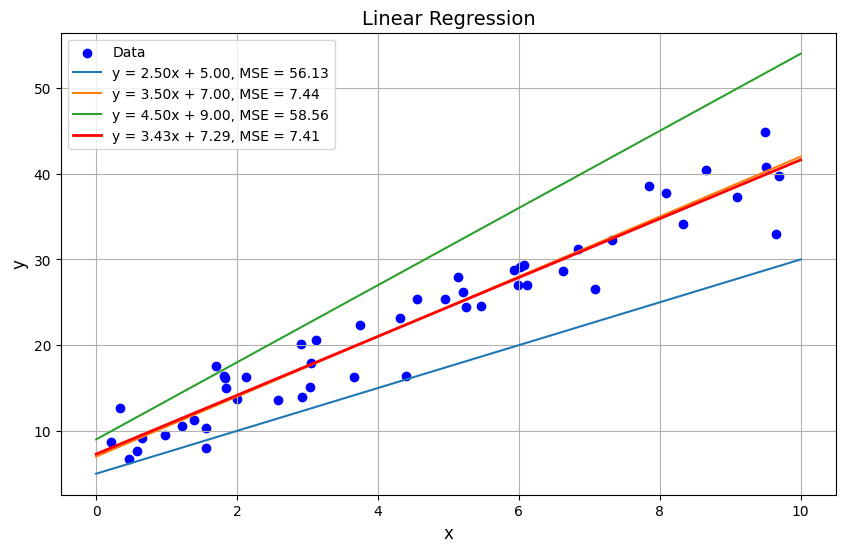

In [8]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt  # Đảm bảo thư viện được import
from sklearn.metrics import mean_squared_error
# 異なる係数での直線を作成
coefficients = [2.5, 3.5, 4.5]  # 異なる係数
intercepts = [5, 7, 9]          # 異なる切片
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Tạo dữ liệu mẫu
np.random.seed(42)
x = np.random.rand(50, 1) * 10  # 50 điểm ngẫu nhiên trên trục x
y = 3.5 * x + 7 + np.random.randn(50, 1) * 3  # y = 3.5x + 7 với một chút nhiễu
plt.figure(figsize=(10, 6))
model = LinearRegression()
model.fit(x, y)

# Đường hồi quy
x_fit = np.linspace(0, 10, 100).reshape(-1, 1)
y_fit = model.predict(x_fit)

# サンプルデータ
plt.scatter(x, y, color="blue", label="Data")

for coef, intercept in zip(coefficients, intercepts):
    # 直線を生成
    y_generated = coef * x_fit + intercept
    mse = mean_squared_error(y, coef * x + intercept)  # MSEを計算
    
    # 直線を描画
    plt.plot(x_fit, y_generated, label=f"y = {coef:.2f}x + {intercept:.2f}, MSE = {mse:.2f}")

# モデルの回帰直線
plt.plot(x_fit, y_fit, color="red", linewidth=2, label=f"y = {model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f}, MSE = {mean_squared_error(y, model.predict(x)):.2f}")

# グラフの設定
plt.title("Linear Regression", fontsize=14)  # タイトル
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [3]:
import csv
import re

def process_text_file_to_csv(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    current_subject = []
    current_content = []
    subjects_and_contents = []

    for line in lines:
        line = line.strip()
        if line.startswith("Chủ đề"):
            # If we're starting a new subject, save the previous one
            if current_subject:
                subjects_and_contents.append((" ".join(current_subject), current_content))
                current_subject = []
                current_content = []

            current_subject.append(line)  # Add new subject
        elif line and not line[0].isdigit():  # This is a continuation of a multi-line subject
            current_subject.append(line)
        else:  # This is content
            current_content.append(line)

    # Add the last subject and content if any
    if current_subject:
        subjects_and_contents.append((" ".join(current_subject), current_content))

    # Prepare rows for a single CSV file
    all_rows = []
    for subject, content in subjects_and_contents:
        tag = subject.replace(':', '').replace('/', '-').replace('\\', '-').replace(' ', '_')

        for entry in content:
            match = re.match(r'^(\d+)\.(.*?)/(.*?)/(.*?):(.*)$', entry)
            if match:
                word = match.group(2).strip()
                pronunciation = match.group(3).strip()
                word_type = match.group(4).strip()
                definition = match.group(5).strip()
            else:
                # Handle lines with missing structure by filling missing columns with empty strings
                parts = entry.split(':', 1)
                if len(parts) == 2:
                    word, definition = parts
                    pronunciation = word_type = ""
                else:
                    word = entry
                    pronunciation = word_type = definition = ""

            all_rows.append([word.strip(), pronunciation.strip(), word_type.strip(), definition.strip(), tag])

    # Write all rows to a single CSV file
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Word', 'Pronunciation', 'Type', 'Definition', 'Tag'])  # Header
        csvwriter.writerows(all_rows)

    print("Tất cả các chủ đề đã được xử lý và lưu vào một file CSV thành công.")

# Gọi hàm với đường dẫn tệp văn bản và tên file CSV đầu ra
process_text_file_to_csv('Update.txt', 'Output.csv')

Tất cả các chủ đề đã được xử lý và lưu vào một file CSV thành công.
